In [1]:
import tensorflow as tf

In [2]:
a = tf.constant(1)
print(a)

Tensor("Const:0", shape=(), dtype=int32)


In [3]:
sess = tf.Session()
print(sess.run(a))

1


In [4]:
def a():
    return 1

print(a)
print(a())

<function a at 0x000000000C583048>
1


In [5]:
a = tf.constant(1)
b = tf.constant(2)
add = a + b

print(add)

Tensor("add:0", shape=(), dtype=int32)


<div style="float:left">
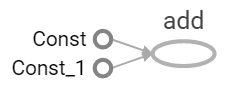
</div>

In [6]:
print(sess.run(add))

3


In [7]:
def add():
    return 1 + 2

print(add)
print(add())

<function add at 0x000000000C55CEA0>
3


In [8]:
def add(a, b):
    return a + b

print(add)
print(add(1, 2))

<function add at 0x0000000009247C80>
3


In [9]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
add = tf.add(a, b)

<div style="float:left">
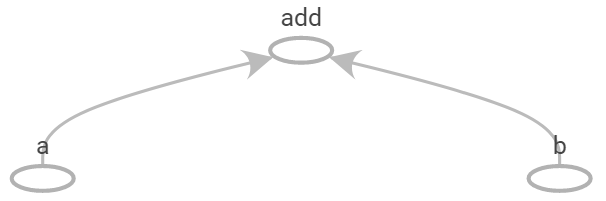
</div>

In [10]:
# print(sess.run(add))

print(sess.run(add, feed_dict={a: 1, b: 1}))

2.0


In [11]:
print(sess.run(add, {a: 1, b: 1}))

2.0


In [12]:
# rank-1 tensors

result = sess.run(add, {a: [1, 2, 3], b: [2, 2, 2]})

print(result)
print(type(result))

[ 3.  4.  5.]
<class 'numpy.ndarray'>


In [13]:
# rank-1 and rank-0 tensors

print(sess.run(add, {a: [1, 2, 3], b: 2}))

[ 3.  4.  5.]


<h2>Hypothesis</h2>
<div style="float:left;">
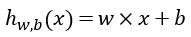
</div>


In [14]:
# hypothesis
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-1., tf.float32)
b = tf.Variable(-1., tf.float32)

h = w * x + b

sess.run(tf.global_variables_initializer())

# init = tf.global_variables_initializer()
# sess.run(init)

<div style="float:left">
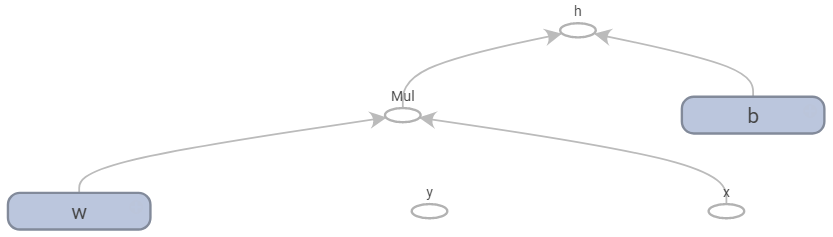
</div>

In [15]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-1., tf.float32)
b = tf.Variable(-1., tf.float32)

h = w * x + b

sess.run(tf.global_variables_initializer())

print(sess.run(h, {x: 1}))

-2.0


In [16]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-1., tf.float32)
b = tf.Variable(-1., tf.float32)

h = w * x + b

sess.run(tf.global_variables_initializer())

print(sess.run(h, {x: [0, 1, 2, 3, 4, 5]}))

[-1. -2. -3. -4. -5. -6.]


<h2>Cost</h2>
<div style="float:left">
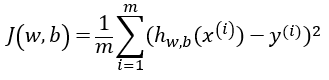
</div>

In [17]:
cost = tf.reduce_mean(tf.square(h - y))

In [18]:
y = tf.constant([1, 2, 3, 4, 5, 6])
h1 = tf.constant([1, 2, 3, 4, 5, 6])
h2 = tf.constant([-1, -2, 0, 4, 7, -2])

print(sess.run(h1 - y))
print(sess.run(h2 - y))

[0 0 0 0 0 0]
[-2 -4 -3  0  2 -8]


In [19]:
y = tf.constant([1, 2, 3, 4, 5, 6])
h1 = tf.constant([1, 2, 3, 4, 5, 6])
h2 = tf.constant([-1, -2, 0, 4, 7, -2])

print(sess.run(tf.square(y)))
print(sess.run(tf.square(h1 - y)))
print(sess.run(tf.square(h2 - y)))

[ 1  4  9 16 25 36]
[0 0 0 0 0 0]
[ 4 16  9  0  4 64]


In [20]:
print(sess.run(tf.reduce_mean([1, 2, 3, 4, 5, 6, 7, 8, 9])))

5


In [21]:
y = tf.constant([1, 2, 3, 4, 5, 6])
h1 = tf.constant([1, 2, 3, 4, 5, 6])
h2 = tf.constant([-1, -2, 0, 4, 7, -2])

print(sess.run(tf.reduce_mean(tf.square(h1 - y))))
print(sess.run(tf.reduce_mean(tf.square(h2 - y))))

0
16


In [22]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-1., tf.float32)
b = tf.Variable(-1., tf.float32)

h = w * x + b

cost = tf.reduce_mean(tf.square(h - y))

sess.run(tf.global_variables_initializer())

<div style="float:left">
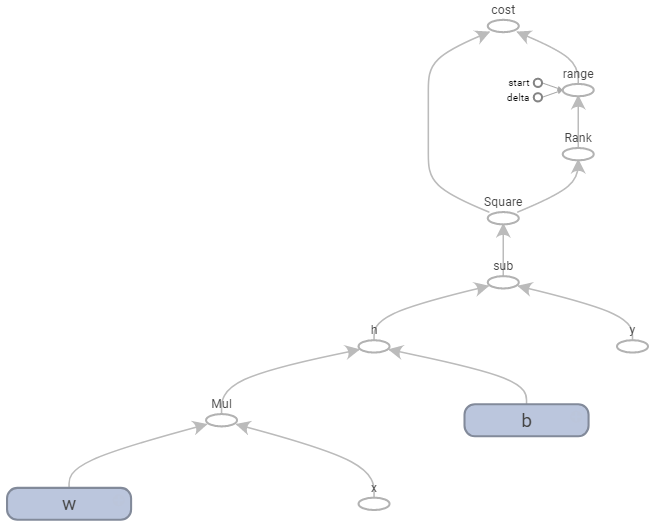
</div>

In [23]:
x_train = [0, 1, 2, 3, 4, 5]
y_train = [1, 2, 3, 4, 5, 6]
print(sess.run(cost, {x: x_train, y: y_train}))

60.6667


In [24]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-1., tf.float32)
b = tf.Variable(-1., tf.float32)

h = w * x + b

cost = tf.reduce_mean(tf.square(h - y))

sess.run(tf.global_variables_initializer())

sess.run(w.assign(1.))
sess.run(b.assign(1.))
print(sess.run(cost, {x: x_train, y: y_train}))

0.0


<h2>Partial Derivatives and Gradient Descent</h2>

In [25]:
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(cost)

In [26]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-1., tf.float32)
b = tf.Variable(-1., tf.float32)

h = w * x + b

cost = tf.reduce_mean(tf.square(h - y))

train = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

sess.run(tf.global_variables_initializer())

<div style="float:left">
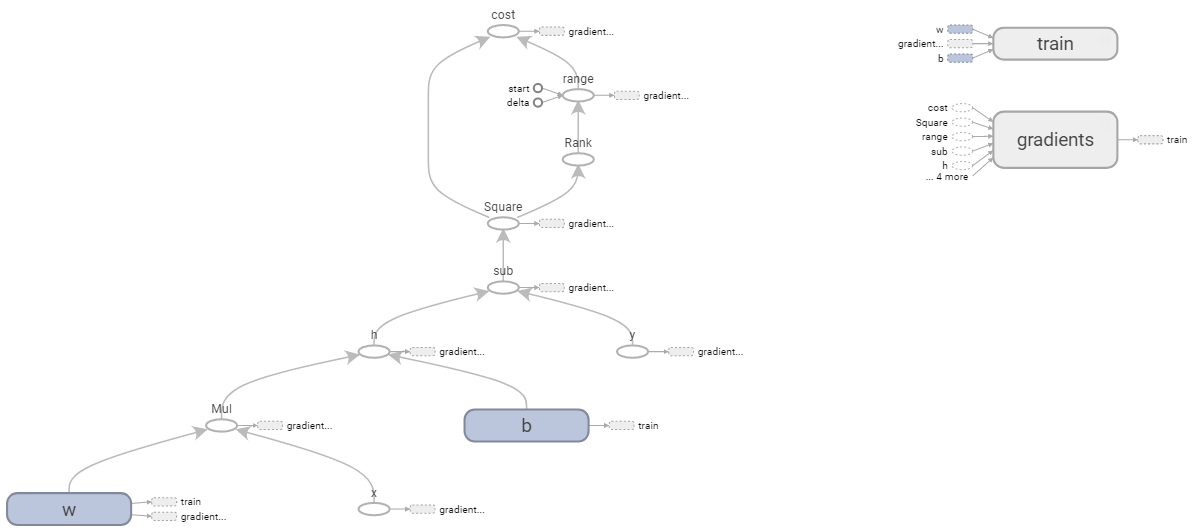
</div>

In [27]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-1., tf.float32)
b = tf.Variable(-1., tf.float32)

h = w * x + b

cost = tf.reduce_mean(tf.square(h - y))

train = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

sess.run(tf.global_variables_initializer())

print(sess.run([w, b]))

x_train = [0, 1, 2, 3, 4, 5]
y_train = [1, 2, 3, 4, 5, 6]

sess.run(train, {x: x_train, y: y_train})

print(sess.run([w, b]))

[-1.0, -1.0]
[1.3333335, -0.30000001]


In [31]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-1., tf.float32)
b = tf.Variable(-1., tf.float32)

h = w * x + b

cost = tf.reduce_mean(tf.square(h - y))

train = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

x_train = [0, 1, 2, 3, 4, 5]
y_train = [1, 2, 3, 4, 5, 6]

for step in range(2000):
    sess.run(train, {x: x_train, y: y_train})

print(sess.run([w, b]))

[1.0000004, 0.99999881]


In [29]:
print(sess.run(h, {x: 6}))

7.0
